# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [6]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd

movies = pd.read_excel(io='../Data/Movie_Ratings.xlsx', sheet_name='movies')
movies

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# 2. Remove the non-genre columns of the movie genre data
genres = movies.drop(columns='Movie_ID').set_index('Movie_Title')
genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [20]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
genres.loc[['Toy Story (1995)', 'Get Shorty (1995)'], :]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(genres.loc[['Toy Story (1995)', 'Get Shorty (1995)'], :])[0][1]

0.3333333333333334

In [12]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cosine_matrix = cosine_similarity(genres)
cosine_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [14]:
cosine_df = pd.DataFrame(cosine_matrix, index=genres.index, columns=genres.index)
cosine_df.head()

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
Movie_Title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [23]:
df_toy_story = cosine_df[['Toy Story (1995)']].sort_values(by='Toy Story (1995)', ascending=False)
df_toy_story

Movie_Title,Toy Story (1995)
Movie_Title,
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
Aladdin (1992),0.866025
"Goofy Movie, A (1995)",0.866025
Jungle2Jungle (1997),0.816497
...,...
City Hall (1996),0.000000
Persuasion (1995),0.000000
Casino (1995),0.000000


In [19]:
# 5. Return the top 5 movies with the highest cosine similarity
df_toy_story.head(6)

Movie_Title,Toy Story (1995)
Movie_Title,
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
Aladdin (1992),0.866025
"Goofy Movie, A (1995)",0.866025
Jungle2Jungle (1997),0.816497
Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [24]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
movies  = pd.read_excel(io='../Data/Movie_Ratings.xlsx', sheet_name='movies')
users   = pd.read_excel(io='../Data/Movie_Ratings.xlsx', sheet_name='users')
ratings = pd.read_excel(io='../Data/Movie_Ratings.xlsx', sheet_name='ratings')
display(movies.head(2))
display(users.head(2))
display(ratings.head(2))

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other


,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3


In [30]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
# sparse matrix
X = ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3)
# X.index.name = None
# X.columns.name = None
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [29]:
ratings.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [31]:
X

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
940,3.0,3.0,3.0,2.0,3.0,3.0,4.0,5.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
941,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [32]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [33]:
# 2. View the user-item matrix and the shape of the user-item matrix
print(X.shape)
X.head()

(943, 1682)


Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [34]:
# 3. View the U matrix and the shape of the U matrix
U = svd.transform(X)

# method 2
# U = svd.fit_transform(X)  # 1628 dims to 2 dims

U_df = pd.DataFrame(U, index=X.index)
print(U_df.shape)
U_df.head()

(943, 2)


,0,1
User_ID,,
1,127.325618,7.173035
2,124.145754,-2.173872
3,122.727835,-2.533026
4,123.802128,-2.822309
5,122.566026,0.754479


In [37]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_
VT_df = pd.DataFrame(VT, columns=X.columns)
print(VT_df.shape)
VT_df

(2, 1682)


Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068072,0.008370,-0.007015,0.051881,-0.004403,-0.009123,0.061828,0.073483,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


## 4. Choosing the Number of Components

In [38]:
# 1. Fit a TruncatedSVD model with 500 components
svd500 = TruncatedSVD(n_components=500)
U500 = svd500.fit_transform(X)
U500.shape

(943, 500)

In [63]:
# 2. Plot the cumulative explained variance ratios
import numpy as np

# view the explained variance ratios
print(svd500.explained_variance_ratio_.round(2))

# view the cumulative explained variance ratio
print(np.cumsum(svd500.explained_variance_ratio_).round(2))

[0.03 0.07 0.04 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.  

In [47]:
cum_evr_500 = list(zip(range(1, U500.shape[1] + 1), np.cumsum(svd500.explained_variance_ratio_))) 
cum_evr_500[:10]

[(1, 0.02634224372337002),
 (2, 0.09670746059197201),
 (3, 0.13352313267970786),
 (4, 0.15416135834298772),
 (5, 0.17065872214204306),
 (6, 0.1847528918559527),
 (7, 0.19777923632260516),
 (8, 0.20900163758765156),
 (9, 0.219511289493174),
 (10, 0.2288346480549974)]

In [50]:
cum_evr_500_df = pd.DataFrame(cum_evr_500).set_index(0)
cum_evr_500_df.head()

,1
0,
1,0.026342
2,0.096707
3,0.133523
4,0.154161
5,0.170659


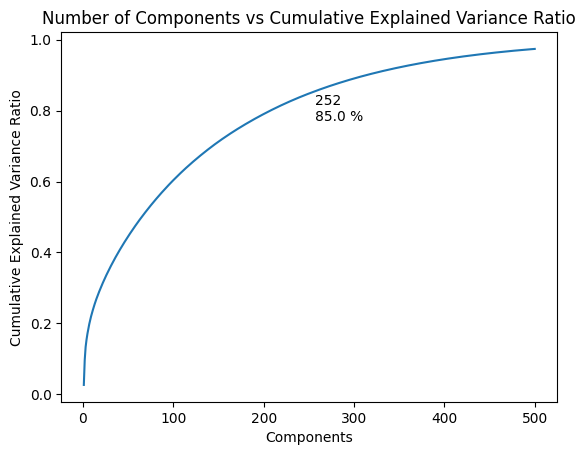

In [86]:
ax = cum_evr_500_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                 xlabel='Components',
                 ylabel='Cumulative Explained Variance Ratio',
                 legend=False)

for idx, row in cum_evr_500_df.iterrows():
    # if (idx % 30) == 0:
    if (row[1]) >= 0.85:
        ax.annotate(str(idx) + '\n' + str((row[1]*100).round(1)) + ' %', (idx, row[1]),
                xytext=(3,-20),
                textcoords='offset points', 
                family='sans-serif', 
                fontsize=10)
        break;

In [91]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# 250 explains about 85%

In [88]:
# 4. Fit another TruncatedSVD model with the “good” number of components
svd250 = TruncatedSVD(n_components=250)
U250 = svd250.fit_transform(X)
print(X.shape)
print(U250.shape)

(943, 1682)
(943, 250)


In [90]:
sum(svd250.explained_variance_ratio_)

0.8467702117212602

## 5. Making Collaborative Filtering Recommendations

In [92]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [97]:
X.shape

(943, 1682)

In [96]:
# 2. Transform the user into the latent space using .transform()
svd250.components_.shape

(250, 1682)

In [95]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
new_user_recs = np.dot(new_user_df, svd250.components_)
new_user_recs   # approximation (if this user was actually in the original data)

ValueError: shapes (1,1682) and (250,1682) not aligned: 1682 (dim 1) != 250 (dim 0)

In [20]:
# 4. Make 10 movie recommendations for the user


In [21]:
# 5. Review the movies and determine if they make sense


In [22]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
